# Project - Prediction of Subject based on Question (NLP) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Dataset/Preprocessed Data.csv')
df.head()

,Unnamed: 0,eng,Subject,Cleaned_eng,Extracted_Text
0,0,An anti-forest measure is\nA. Afforestation\nB...,Biology,An anti forest measure is A Afforestation B Se...,an anti forest measure is a afforestation b se...
1,1,"Among the following organic acids, the acid pr...",Chemistry,Among the following organic acids the acid pre...,among the following organic acids the acid pre...
2,2,If the area of two similar triangles are equal...,Maths,If the area of two similar triangles are equal...,if the area of two similar triangles are equal...
3,3,"In recent year, there has been a growing\nconc...",Biology,In recent year there has been a growing concer...,in recent year there has been a growing concer...
4,4,Which of the following statement\nregarding tr...,Physics,Which of the following statement regarding tra...,which of the following statement regarding tra...


In [3]:
df.drop(['Unnamed: 0','eng','Cleaned_eng'],axis=1,inplace=True)

In [4]:
df.head()

,Subject,Extracted_Text
0,Biology,an anti forest measure is a afforestation b se...
1,Chemistry,among the following organic acids the acid pre...
2,Maths,if the area of two similar triangles are equal...
3,Biology,in recent year there has been a growing concer...
4,Physics,which of the following statement regarding tra...


In [5]:
print (df['Subject'].value_counts())

Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: Subject, dtype: int64


In [6]:
encoding = {'Subject': {'Physics':1,'Chemistry':2,'Maths':3,'Biology':4}}
df.replace(encoding, inplace=True)
df.head()

,Subject,Extracted_Text
0,4,an anti forest measure is a afforestation b se...
1,2,among the following organic acids the acid pre...
2,3,if the area of two similar triangles are equal...
3,4,in recent year there has been a growing concer...
4,1,which of the following statement regarding tra...


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Subject           0
Extracted_Text    0
dtype: int64

### Constructing Features using Vectorizers

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Extracted_Text'].values
requiredTarget = df['Subject'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_features=1000,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature construction completed .....")

Feature construction completed .....


In [10]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(97956, 1000)
(24490, 1000)


## Comparative Model Analysis

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train.todense(), y_train)
preds1 = clf1.predict(X_test.todense())
print('Accuracy of Logistic regression on training set: {:.2f}'.format(clf1.score(X_train.todense(), y_train)))
print('Accuracy of Logistic regression on test set:     {:.2f}'.format(clf1.score(X_test.todense(), y_test)))

Accuracy of Logistic regression on training set: 0.88
Accuracy of Logistic regression on test set:     0.88



 Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7685
           2       0.85      0.87      0.86      7544
           3       0.92      0.93      0.92      6637
           4       0.76      0.74      0.75      2624

    accuracy                           0.88     24490
   macro avg       0.86      0.86      0.86     24490
weighted avg       0.88      0.88      0.88     24490




<AxesSubplot:ylabel='Density'>

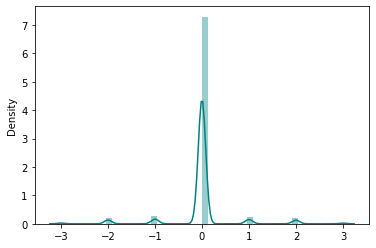

In [12]:
print("\n Classification report for classifier %s:\n%s\n" % (clf1, metrics.classification_report(y_test, preds1)))
sns.distplot(y_test-preds1, color='teal')

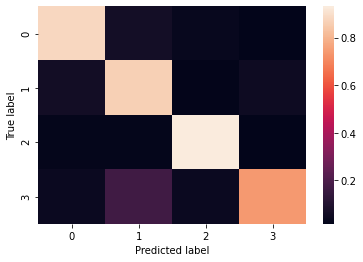

In [13]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds1)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### K-Nearest Neighbour Algorithm

In [14]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train.todense(), y_train)
preds2 = clf2.predict(X_test.todense())
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf2.score(X_train.todense(), y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf2.score(X_test.todense(), y_test)))

Accuracy of KNeighbors Classifier on training set: 0.87
Accuracy of KNeighbors Classifier on test set:     0.80



 Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           1       0.88      0.74      0.80      7685
           2       0.80      0.80      0.80      7544
           3       0.84      0.91      0.88      6637
           4       0.55      0.66      0.60      2624

    accuracy                           0.80     24490
   macro avg       0.77      0.78      0.77     24490
weighted avg       0.81      0.80      0.80     24490




<AxesSubplot:ylabel='Density'>

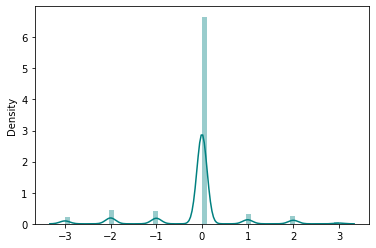

In [15]:
print("\n Classification report for classifier %s:\n%s\n" % (clf2, metrics.classification_report(y_test, preds2)))
sns.distplot(y_test-preds2, color='teal')

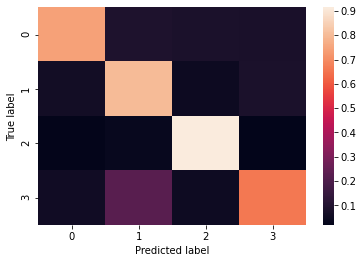

In [16]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds2)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
clf3.fit(X_train.todense(), y_train)
preds3 = clf3.predict(X_test.todense())
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf3.score(X_train.todense(), y_train)))
print('Accuracy of Decision Tree Classifier on test set:     {:.2f}'.format(clf3.score(X_test.todense(), y_test)))

Accuracy of Decision Tree Classifier on training set: 0.98
Accuracy of Decision Tree Classifier on test set:     0.81



 Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      7685
           2       0.79      0.79      0.79      7544
           3       0.87      0.86      0.87      6637
           4       0.67      0.69      0.68      2624

    accuracy                           0.81     24490
   macro avg       0.79      0.79      0.79     24490
weighted avg       0.81      0.81      0.81     24490




<AxesSubplot:ylabel='Density'>

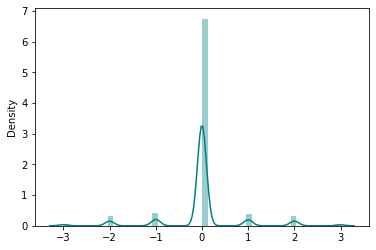

In [18]:
print("\n Classification report for classifier %s:\n%s\n" % (clf3, metrics.classification_report(y_test, preds3)))
sns.distplot(y_test-preds3, color='teal')

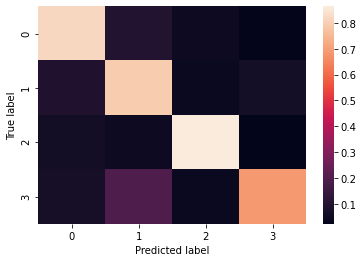

In [19]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds3)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(X_train.todense(), y_train)
preds4 = clf4.predict(X_test.todense())
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf4.score(X_train.todense(), y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(clf4.score(X_test.todense(), y_test)))

Accuracy of Random Forest Classifier on training set: 0.98
Accuracy of Random Forest Classifier on test set:     0.87



 Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           1       0.89      0.87      0.88      7685
           2       0.84      0.86      0.85      7544
           3       0.91      0.93      0.92      6637
           4       0.76      0.71      0.73      2624

    accuracy                           0.87     24490
   macro avg       0.85      0.84      0.85     24490
weighted avg       0.87      0.87      0.87     24490




<AxesSubplot:ylabel='Density'>

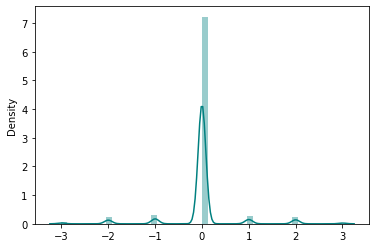

In [21]:
print("\n Classification report for classifier %s:\n%s\n" % (clf4, metrics.classification_report(y_test, preds4)))
sns.distplot(y_test-preds4, color='teal')

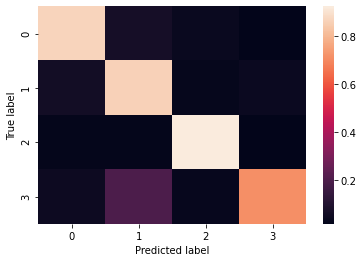

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds4)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### XGBoost classifier

In [23]:
import xgboost as xgb

In [24]:
clf5 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)
clf5.fit(X_train.todense(), y_train)
preds5 = clf5.predict(X_test.todense())
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf5.score(X_train.todense(), y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(clf5.score(X_test.todense(), y_test)))

[20:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Random Forest Classifier on training set: 0.88
Accuracy of Random Forest Classifier on test set:     0.87



 Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None):
              precision    recall  f1-score   support

           1       0.90      0.86      0.88      7685
           2       0.84      0.87      0.85      7544
           3       0.92      0.92      0.92      6637
           4       0.73      0.76      0.74      2624

    accuracy                           0.87     24490
   macro avg  

<AxesSubplot:ylabel='Density'>

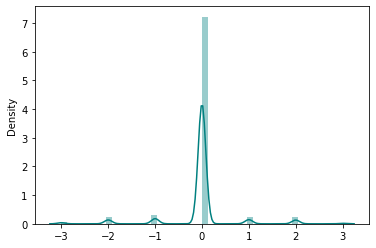

In [25]:
print("\n Classification report for classifier %s:\n%s\n" % (clf5, metrics.classification_report(y_test, preds5)))
sns.distplot(y_test-preds5, color='teal')

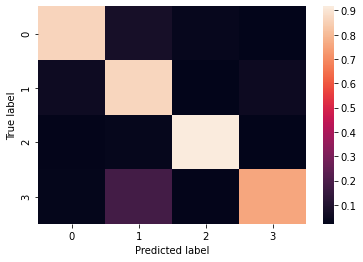

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds5)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Gausian Naive Bayes Classifier Algorithm

In [27]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6.fit(X_train.todense(), y_train)
preds6 = clf6.predict(X_test.todense())
print('Accuracy of Naive Bayes classifiers on training set: {:.2f}'.format(clf6.score(X_train.todense(), y_train)))
print('Accuracy of Naive Bayes classifiers on test set:     {:.2f}'.format(clf6.score(X_test.todense(), y_test)))

Accuracy of Naive Bayes classifiers on training set: 0.77
Accuracy of Naive Bayes classifiers on test set:     0.76



 Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           1       0.92      0.75      0.83      7685
           2       0.88      0.59      0.70      7544
           3       0.77      0.96      0.86      6637
           4       0.40      0.75      0.52      2624

    accuracy                           0.76     24490
   macro avg       0.74      0.76      0.73     24490
weighted avg       0.81      0.76      0.76     24490




<AxesSubplot:ylabel='Density'>

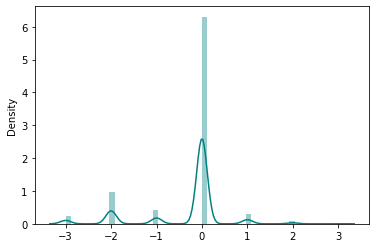

In [28]:
print("\n Classification report for classifier %s:\n%s\n" % (clf6, metrics.classification_report(y_test, preds6)))
sns.distplot(y_test-preds6, color='teal')

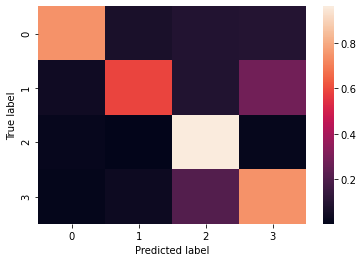

In [29]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,preds6)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Since Random Forest Classifier performs better than other models with a Training Accuracy of 98% and a testing accuracy of 87% we will save this model

In [35]:
import pickle

file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Model/rf_net.pkl','wb')

In [36]:
pickle.dump(clf4, file)

### Saving the predictions in a dataframe 

In [37]:
preds4

array([1, 1, 3, ..., 3, 3, 1], dtype=int64)

In [38]:
rf_predictions = pd.DataFrame()
rf_predictions['Predicted Subjects'] = preds4
rf_predictions

,Predicted Subjects
0,1
1,1
2,3
3,1
4,2
...,...
24485,1
24486,3
24487,3
24488,3


In [39]:
rf_predictions['Predicted Subjects']  = rf_predictions['Predicted Subjects'].apply(str)

In [40]:
rf_predictions.replace(['1','2','3','4'],['Physics','Chemistry','Maths','Biology'],inplace=True)

rf_predictions.head()

,Predicted Subjects
0,Physics
1,Physics
2,Maths
3,Physics
4,Chemistry


In [42]:
rf_predictions.to_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Prediction of Subject based on Question (NLP)\Dataset/RF_predictions.csv',header=True,index=False)

Text(0.5, 1.0, 'Random Forest Predictions of the Subjects')

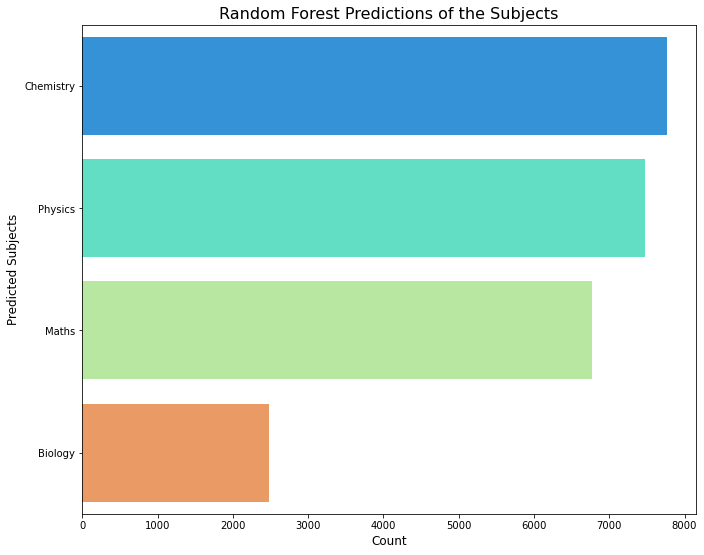

In [45]:
plt.figure(figsize = (11,9))
sns.countplot(y = 'Predicted Subjects',
              data = rf_predictions,
              order= rf_predictions['Predicted Subjects'].value_counts().index,
              palette = 'rainbow' )
plt.xlabel('Count',fontsize=12)
plt.ylabel('Predicted Subjects',fontsize=12)
plt.title('Random Forest Predictions of the Subjects',fontsize=16)